In [1]:
from keras.models import load_model

Using TensorFlow backend.


In [2]:
model = load_model('GRU_11_20_15_30.h5')

In [3]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# matfn = u'D:\\学习\\论文相关\\脑机\\程序\\原模型\\SimulationResults\\训练数据delta为1.mat'
# data = sio.loadmat(matfn)
# P = data['P'].T.reshape((233600, 1, 60))
# T = data['m'].reshape((233600, 1, 1))
# P_train = P[:180000, :, :]
# T_train = T[:180000, :, :]
# P_test = P[180000:, :, :]
# T_test = T[180000:, :, :]
# print(T.shape)

In [5]:
from sklearn.externals import joblib
stdsc = joblib.load('stdsc.m')
matfn = u'C:\\Users\\XR\\Desktop\\论文python程序\\Q1.mat'
matfn2 = u'C:\\Users\\XR\\Desktop\\论文python程序\\M1.mat'
data = sio.loadmat(matfn)
data2 = sio.loadmat(matfn2)
P = data['Q1'].T
P = stdsc.transform(data['Q1'].T)
P = P.reshape((235200, 1, 60))
T = data2['dataTrdM'].reshape((235200, 1, 1))
P_train = P[:180000, :, :]
T_train = T[:180000, :, :]
P_test = P[180000:, :, :]
T_test = T[180000:, :, :]
print(P_test.shape)

(55200, 1, 60)


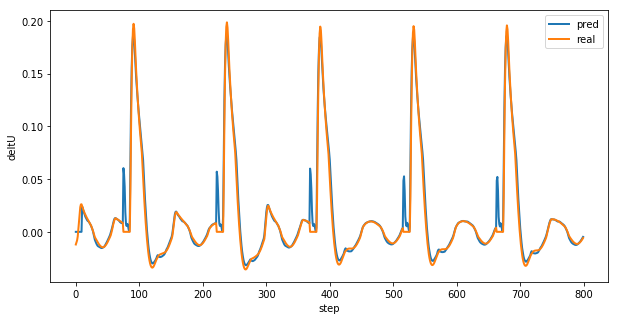

In [6]:
pred = []
real = []
for i in range(0, 800):
    if i <= 9:
        pred.append(0)
        real.append(T_test[i])
    else:
        Predarray = P_test[i,0,:].reshape(1,1,60)
        predNum = model.predict(Predarray)
        pred.append(predNum)
        real.append(T_test[i,0,0])
plt.figure(figsize=(10,5))
plt.plot(pred, linewidth=2, label='pred')
plt.plot(real, linewidth=2, label='real')
plt.xlabel('step')
plt.ylabel('deltU')
plt.legend()
plt.show()